# Wstęp do Sztucznej Inteligencji - rok akademicki 2019/2020

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Optymalizacja globalna: Problem plecakowy - Zadania
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.


## Problem plecakowy
Problem plecakowy to problem optymalizacji dyskretnej. W swojej najprostszej wersji może być sformułowany następująco.

Spośród `N` dostępnych przedmiotów możmy zabrać taką ich liczbę by suma ich wag nie przekraczała pewnej dopuszczalnej wartości (maksymalne obciążenie plecaka). Każdy przedmiot, oprócz wagi, ma przypisaną swoją wartość. 

Które przedmioty zabrać, aby ich sumaryczna wartość była jak największa, ale ich sumaryczna waga nie przekraczała dopuszczalnej maksymalnej wagi plecaka?

Mamy zatem do czynienia z problemem optymalizacji z ograniczeniami.

Przeczytaj więcej o problemie plecakowym: https://pl.wikipedia.org/wiki/Problem_plecakowy

## Prosty generator problemu plecakowego (0-1 knapsack problem)

Generujemy listę przedmiotów, z losowymi wagami oraz wartościami z podanych przedziałów.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

#wmin - minimalna waga przedmiotu
#wmax - maksymalna waga przedmiotu
#vmin - minimalna wartość przedmiotu
#vmax - maksymalna wartość przedmiotu
#items_num - liczba dostępnych przedmiotów
def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

Przykładowy problem plecakowy (zwróć uwagę, że możemy zagwarantować generowanie za każdym razem tego samego problemu poprzez ustawienie ziarna generatora liczb losowych).

In [6]:
num = 50  # liczba przedmiotów
wmin = 1  # minimlana waga
wmax = 100  # maksymalna waga
vmin = 1  # minimalna wartosc
vmax = 100  # maksymalna wartosc
knapsack_perc = 0.5  # pojemnosc plecaka jako procent sumy wag wszystkich przedmiotow

# ustawienie ziarna
np.random.seed(1111)

w, v = generate_problem(wmin, wmax, vmin, vmax, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall) # pojemnosc plecaka

print('Problem plecakowy:')
print('pojemnosc plecaka:', W)
print('wagi:',w, 'suma:', Wall)
print('wartosci:',v, 'suma:', Vall)

Problem plecakowy:
pojemnosc plecaka: 1140
wagi: [29 56 82 13 35 53 25 23 21 12 15  9 13 87  9 63 62 52 43 77 95 79 77  5
 78 41 10 10 88 19  1 37  9 70 22 82 46 51 97 46 12 32 56 30 86 45 99 89
  1 88] suma: 2280
wartosci: [94 48 26 65 53 54 76 48 98 63 67 74 40 41 76  8 10 78 18 79 92 23  3 64
 22 43 24 75  8 36 78  6 98 33 49 31 15 21 30 44 14 75 55 22 71 95 94  9
 68 65] suma: 2479


## Zadanie 1 (obowiązkowe, 1pkt.) - rozwiązanie metodą brute force

Mamy problem plecakowy ze 100 przedmiotami. Chcemy sprawdzić każde możliwe rozwiązanie. Jeśli w ciągu sekundy moglibyśmy sprawdzić miliard rozwiązań, to ile lat by to trwało? Przyjmij, że rok ma 365 dni.

Otrzymaną liczbę lat przypisz do zmiennej o nazwie `liczba_lat`. Wynik zaokrąglij do pełnych lat w dół.

In [7]:
liczba_lat_f = (2**100)/1000000000/60/60/24/365
liczba_lat = int(liczba_lat_f)
print('Sprawdzanie zajmie: {} lat'.format(liczba_lat))

Sprawdzanie zajmie: 40196936841331 lat


## Kodowanie rozwiązania

Potencjalne rozwiązanie problemu plecakowego można zakodować jako wektor `0`/`1`, gdzie `1` oznacza wybranie przedmiotu do plecaka.

Warto skorzystać z kodowania `True`/`False` i tablic `numpy`, gdyż ułatwi to obliczenia (macierze True/False mogą służyć do indeksowania innych macierzy).

Przykładowo:

In [8]:
num = w.shape[0]
sol = np.random.randint(0, 2, size=num, dtype=np.bool)  # True oznacza, ze przedmiot jest wybrany

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
  True  True False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 24 25 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1212
Suma wartosci: 1046


## Rozwiązania dopuszczalne i niedopuszczalne - procedura naprawcza

Jeśli suma wag przekracza pojemność plecaka, to rozwiązanie jest rozwiązaniem niedopuszczalnym i jest całkowicie nieprzydatne.

Rozwiązanie niedopuszczalne można poddać procedurze naprawczej. Przykładowo, poniższa funkcja usuwa przedmioty z plecaka, dopóki nie powstanie rozwiązanie dopuszczalne.

In [9]:
# Usuwa losowe przedmioty, aż rozwiązanie stanie się dopuszczalne
# Jesli rowziazanie jest dopuszczlane, nie zostanie zmienione
def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx%num] == False:
            indx = indx + 1
        sol[indx%num] = False

__Przykładowa naprawa:__

In [10]:
correct_solution(w, v, W, sol)

print('Rozwiązanie:', sol)
print('Lista wybranych przedmiotow:', np.arange(num)[sol])
print('Suma wag:', w[sol].sum())
print('Suma wartosci:', v[sol].sum())

Rozwiązanie: [False  True False False False False False  True False  True False  True
 False False False  True False  True  True False  True  True  True False
 False False False  True  True  True False False  True False False  True
  True  True False  True False False False False False  True  True  True
 False False]
Lista wybranych przedmiotow: [ 1  7  9 11 15 17 18 20 21 22 27 28 29 32 35 36 37 39 45 46 47]
Suma wag: 1093
Suma wartosci: 981


## Losowe, dopuszczalne rozwiązania

Bazując na powyższej procedurze, można zdefiniować funkcję generującą losowe, ale zawsze dopuszczalne rozwiązania.

In [11]:
def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0,2, size=num, dtype=np.bool)  # 1 / True oznacza, ze przedmiot jest wybrany
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w,v,W,sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V

__Przykład użycia:__

In [12]:
sol = get_random_solution(w,v,W)

print('Rozwiązanie:', sol[0])
print('Lista wybranych przedmiotow:', np.arange(num)[sol[0]])
print('Suma wag:', sol[1])
print('Suma wartosci:', sol[2])

Rozwiązanie: [ True False  True False False False False  True  True  True  True False
  True  True  True False False  True  True  True False False False False
  True  True False  True False  True  True  True False  True  True False
 False False False False  True False  True  True False False  True  True
 False  True]
Lista wybranych przedmiotow: [ 0  2  7  8  9 10 12 13 14 17 18 19 24 25 27 29 30 31 33 34 40 42 43 46
 47 49]
Suma wag: 1115
Suma wartosci: 1329


## Random search

Powyższe funkcje można przełożyć na prostą heurystykę przeszukiwania losowego. Generujemy losowe (ale dopuszczalne) rozwiązania przez zadaną liczbę iteracji i zapamiętujemy najlepsze. Dodatkowo, zapisujemy oceny rozwiązań (wartość wszystkich przedmiotów w plecaku) by przedstawić je na wykresie.

In [13]:
def search_random(w,v,W,iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w,v,W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best

__Przykładowe uruchomienie:__

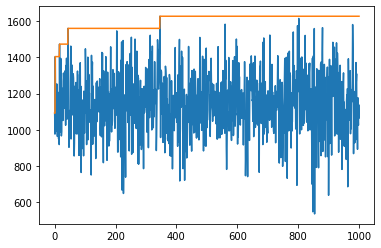

Najlepsze rozwiązanie: [ True False False False False  True  True  True  True  True  True  True
  True False False  True  True  True  True  True False False  True  True
 False  True False  True False  True  True  True  True False False False
 False False  True  True  True  True False False False  True  True False
 False  True]
Przedmioty: [ 0  5  6  7  8  9 10 11 12 15 16 17 18 19 22 23 25 27 29 30 31 32 38 39
 40 41 45 46 49]
Suma wag: 1115
Suma wartosci: 1627


In [14]:
sol_random_search = search_random(w, v, W, 1000)

print('Najlepsze rozwiązanie:',sol_random_search[0])
print('Przedmioty:',np.arange(num)[sol_random_search[0]])
print('Suma wag:', sol_random_search[1])
print('Suma wartosci:', sol_random_search[2])

## Greedy search - procedura optymalizacji zachłannej

Problemem w powyższym podejściu jest fakt, że kolejne rozwiązania nie korzystają z uzyskanej już wiedzy o najlepszych do tej pory rozwiązaniach. Zatem inna prosta heurytyka polega na wystartowaniu z losowego rozwiązania, a następnie modyfikowaniu go poprzez losowe dodawanie przedmiotu do plecaka. Jeśli zmiana (po ewentualnej naprawie) wprowadza poprawę, pozostajemy przy takim rozwiązaniu, jeśli następuje pogorszenie, odrzucamy takie rozwiązanie i ponawiamy próbę.

Taka procedura jest przykładem optymalizacji zachłannej.

In [15]:
def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w,v,W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        #set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx%num] == True:
            indx = indx + 1
        sol[indx%num] = True
        #correct if needed
        if w[sol].sum() > W:
            correct_solution(w,v,W,sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    plt.figure()
    plt.plot(v_all)
    plt.plot(v_best)
    plt.show()
    return best_sol, best_W, best_V, v_all, v_best 

__Przykładowe uruchomienie:__

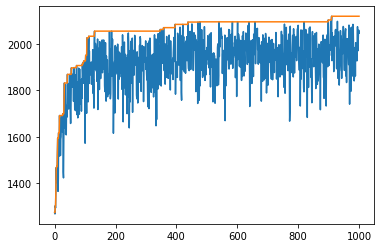

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True False False  True False  True  True False False  True
 False False  True  True False  True  True False  True False  True False
 False False False  True  True  True False  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 17 19 20 23 26 27 29 30 32 34
 39 40 41 43 44 45 46 48 49]
Suma wag: 1139
Suma wartosci: 2118


In [16]:
sol_greedy = search_greedy_improvement(w,v,W,1000)

print('Najlepsze rozwiązanie:',sol_greedy[0])
print('Przedmioty:',np.arange(num)[sol_greedy[0]])
print('Suma wag:', sol_greedy[1])
print('Suma wartosci:', sol_greedy[2])

## Dwie inne proste heurystyki

### Najpierw najbardziej wartościowe

Jak dobre rozwiązanie dostaniemy, jeśli do plecaka pakować będziemy najpierw najbardziej wartościowe przedmioty (o ile się zmieszczą)? Pomysł ten jest zaimplementowany w poniższej funkcji.

In [17]:
#Pakuje najpierw najbardziej wartościowe przedmioty
def get_value_first(w, v, W):
    ii = np.argsort(-v)
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [18]:
sol_value_first = get_value_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_value_first[0])
print('Przedmioty:',np.arange(num)[sol_value_first[0]])
print('Suma wag:', sol_value_first[1])
print('Suma wartosci:', sol_value_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True False  True  True  True  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 41 42 43 44 45 46 48 49]
Suma wag: 1137
Suma wartosci: 2161


### Najpierw te o najlepszym stosunku wartości do wagi

Inny pomysł to pakowanie najpierw przedmiotów o najlepszym stosunku wartości do wagi.

In [19]:
def get_ratio_first(w, v, W):
    ii = np.argsort(-v/w) #stosunek wartosci do wagi
    num = w.shape[0]
    sol = np.repeat(False, num)
    _W = 0
    for i in range(num):
        if _W + w[ii[i]] <= W:
            sol[ii[i]] = True
            _W = _W + w[ii[i]]
    _V = v[sol].sum()
    return sol, _W, _V

__Przykładowe uruchomienie:__

In [20]:
sol_ratio_first = get_ratio_first(w, v, W)

print('Najlepsze rozwiązanie:',sol_ratio_first[0])
print('Przedmioty:',np.arange(num)[sol_ratio_first[0]])
print('Suma wag:', sol_ratio_first[1])
print('Suma wartosci:', sol_ratio_first[2])

Najlepsze rozwiązanie: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False False  True False  True  True False False  True
 False  True  True  True False  True  True False  True False  True False
 False False False  True  True  True  True False  True  True  True False
  True  True]
Przedmioty: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 17 19 20 23 25 26 27 29 30 32 34
 39 40 41 42 44 45 46 48 49]
Suma wag: 1119
Suma wartosci: 2153


## Zadanie 2 (obowiązkowe, 3 pkt.)

Opracowane być mogą inne procedury naprawcze. Przykładowo, dla rozwiązania niedopuszczalengo, zamiast zmieniać losowe bity True na False, jak w funkcji `correct_solution`, można usuwać najpierw te przedmioty, które mają najgorszy stosunek wartości do wagi. Zaimplementuj taką procedurę. 

Porównaj jej działanie z funkcją `correct_solution` w metodach RandomSearch oraz GreedySearch. Przedstaw uśrednione wyniki (co najmniej 10 uruchomień) i wnioski.

TWÓJ PROGRAM:

In [39]:
import numpy as np

num = 50
weight_min = 1
weight_max = 100
value_min = 1
value_max = 100
knapsack_perc = 0.5


def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  # weight
    v = np.random.randint(vmin, vmax, size=items_num)  # values
    return w, v


def poprawne_rozwiazanie(w, v, W, sol):
    st = np.argsort(v / w)
    i = 0
    while w[sol].sum() > W:
        index = st[i]
        sol[index] = False
        i = i + 1


def correct_solution(w, v, W, sol):
    num = w.shape[0]
    while w[sol].sum() > W:
        indx = np.random.randint(num)
        while sol[indx % num] == False:
            indx = indx + 1
        sol[indx % num] = False


def get_random_solution(w, v, W):
    num = w.shape[0]
    sol = np.random.randint(0, 2, size=num, dtype=np.bool)
    _V = np.sum(v[sol])
    _W = np.sum(w[sol])
    if _W > W:
        correct_solution(w, v, W, sol)
        _V = np.sum(v[sol])
        _W = np.sum(w[sol])
    return sol, _W, _V




def search_random(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    for i in range(iters):
        sol, _W, _V = get_random_solution(w, v, W)
        if best_V < _V:
            best_sol, best_W, best_V = sol, _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best

    return sol, _W, _V




def search_greedy_improvement(w, v, W, iters):
    best_sol, best_W, best_V = get_random_solution(w, v, W)
    v_all = [best_V]
    v_best = [best_V]
    num = w.shape[0]
    for i in range(iters):
        sol = best_sol.copy()
        # set random 0 bit to 1
        indx = np.random.randint(num)
        while sol[indx % num] == True:
            indx = indx + 1
        sol[indx % num] = True
        # correct if needed
        if w[sol].sum() > W:
            correct_solution(w, v, W, sol)
        _V = v[sol].sum()
        _W = w[sol].sum()
        if best_V < _V:
            best_sol, best_W, best_V = sol.copy(), _W, _V
        v_all.append(_V)
        v_best.append(best_V)
    return best_sol, best_W, best_V, v_all, v_best



##testy
n_iter = 10
import time

np.random.seed(121023)
w, v = generate_problem(weight_min, weight_max, value_min, value_max, num)  # w - wagi, v - wartosci
Wall = w.sum()
Vall = v.sum()
W = int(knapsack_perc * Wall)  # pojemnosc plecaka
num = w.shape[0]
sol = np.random.randint(0, 2, size=num, dtype=np.bool)
print("Poj max: ", W)

#  correct
poprawione_v = 0
# poprawne_rozwiazanie
poprawione_w = 0
# random
poprawione_vr = []
poprawione_wr = []

# greedy
poprawione_vg = []
poprawione_wg = []



def test_corrector(w_2, v_2, W_2, fun):

    rozwiazanie_search = fun(w_2, v_2, W_2, 500)
    poprawione_w = rozwiazanie_search[1]
    poprawione_v = rozwiazanie_search[2]
    return poprawione_v, poprawione_w


def test_runner(result_value, result_weight, calc_result):
    result_v, result_w = calc_result
    result_value.append(result_v)
    result_weight.append(result_w)


for i in range(n_iter):
    w_2 = np.copy(w)
    v_2 = np.copy(v)
    sol_2 = np.copy(sol)

    correct_solution(w_2, v_2, np.copy(W), sol_2)
    poprawione_v += v_2[sol_2].sum()
    poprawione_w += w_2[sol_2].sum()

  

    test_runner(poprawione_vr, poprawione_wr, test_corrector(np.copy(w), np.copy(v), np.copy(W), search_random))
    

    test_runner(poprawione_vg, poprawione_wg,
                test_corrector(np.copy(w), np.copy(v), np.copy(W), search_greedy_improvement))


print("correct_solution")
print("Poprawione w: ", poprawione_w / n_iter)
print("Poprawione v: ", poprawione_v / n_iter)

print("search_random")
print("Poprawione w: ", np.mean(poprawione_wr))
print("Poprawione v: ", np.mean(poprawione_vr))

print("search_greedy")
print("Poprawione w: ", np.mean(poprawione_wg ))
print("Poprawione v: ", np.mean(poprawione_vg ))


Poj max:  1179
correct_solution
Poprawione w:  1131.3
Poprawione v:  1070.9
search_random
Poprawione w:  1132.1
Poprawione v:  1642.4
search_greedy
Poprawione w:  1172.7
Poprawione v:  2035.5


Najlepsze wyniki otrzymuje greedy ,reszta wyników nieznacznie różni się od siebie.

## Zadanie 3 (obowiązkowe, 6 pkt.)

Dostosuj swoją implementację algorytmu genetycznego do problemu plecakowego. 

- Jakie wyniki można uzyskać z jego pomocą? Czy działa on zawsze lepiej niż inne heurystyki?

- Która procedura naprawcza działa lepiej w algorytmie genetycznym?

- Przedstaw wnioski na podstawie uśrednionych wyników dla problemów plecakowych o rozmiarze 50, 100, 300.

- Problemy plecakowe i najlepsze znalezione rozwiązania zapisz do plików.

UWAGA! Po wygenerowaniu problemu plecakowego, przed uruchomieniem algorytmu genetycznego (lub innego) wywołaj:

`np.random.seed(int(time.time()))`

tak by problem plecakowy generował się ten sam, ale algorytmy miały szansę na nowy przebieg.

TWÓJ PROGRAM:

initial best 1593
better solution of  1674 in 2
better solution of  1685 in 8
better solution of  1702 in 10
better solution of  1759 in 11
better solution of  1789 in 14
better solution of  1869 in 15


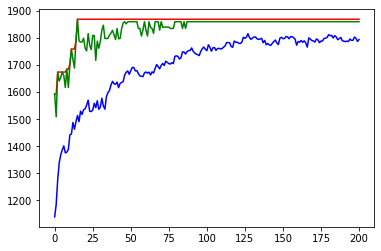

initial best 2093
better solution of  2101 in 1
better solution of  2104 in 2
better solution of  2137 in 8


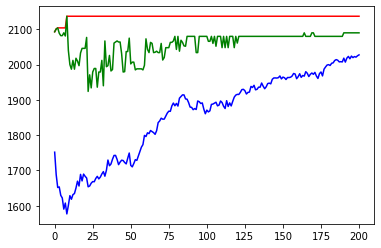

initial best 3977
better solution of  4362 in 1
better solution of  4568 in 2
better solution of  4655 in 15
better solution of  4714 in 37
better solution of  4762 in 51
better solution of  4770 in 54
better solution of  4813 in 69
better solution of  4826 in 118
better solution of  4827 in 129
better solution of  4905 in 132
better solution of  4910 in 187


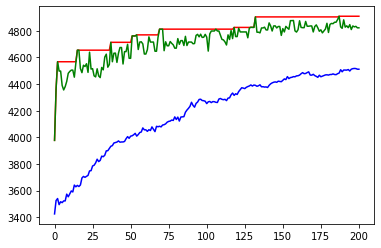

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def correct_individual(w, v, W, sol):
    ii = np.argsort(v/w) #stosunek wartosci do wagi
    index = 0
    while w[sol].sum() > W:
        sol[ii[index]] = False
        index += 1

def gen_pop(w, v, W, pop_size):
    pop =[]
    for i in range(0, pop_size):
        pop.append(np.random.randint(0,2, size=pop_size, dtype=np.bool))
        if w[pop[i]].sum() > W:
            correct_individual(w, v, W, pop[i])
    return pop

def evaluate(pop, v):
    evaluated_pop = []
    for individual in pop:
        evaluated_pop.append(v[individual].sum())
    return evaluated_pop

def select(pop, evals):
    evals = np.asarray(evals)
    min_elem = evals.min()
    cumulative_sum=np.cumsum(evals)
    suma=np.sum( cumulative_sum)    
    max_elem = cumulative_sum.max()
    new_pop=[]
    x = len(pop)
    for i in range(0, x):
        probability = np.random.uniform(0,max_elem)
        for j in range (0, x-1):
            if probability > cumulative_sum[j] and probability <=  cumulative_sum[j+1]:
                new_pop.append(pop[j+1])
                break
        else:
            new_pop.append(pop[0])
                  
    return new_pop

def xover(pop, p, w,v,W):
    new_pop = []
    for i in range(0, len(pop), 2):
        if i== len(pop)-1:
            new_pop.append(pop[i])
        else:
            probability = np.random.random()
            if probability < p:
                cr=np.random.randint(0, len(w))
                for j in range(0, len(w)):
                    indiv1=np.ndarray(len(w), dtype=np.bool)
                    indiv2=np.ndarray(len(w), dtype=np.bool)
                    if j >= cr:
                        indiv1[j] = pop[i+1][j]
                        indiv2[j] = pop[i][j]
                    else:
                        indiv1[j]=pop[i][j]
                        indiv2[j] = pop[i+1][j]
                    
                if w[indiv1].sum() > W:
                    correct_individual(w, v, W, indiv1)
                if w[indiv2].sum() > W:
                    correct_individual(w, v, W, indiv2)
                new_pop.append(indiv1)
                new_pop.append(indiv2)
            else:
                new_pop.append(pop[i])
                new_pop.append(pop[i+1])
            
    return new_pop
def mutate(pop, p, w,v,W):  
    for individual in pop:
        for gene in individual:
            probability = np.random.random()
            if probability < p:
                if gene == 1:
                    gene = 0
                else:
                    gene = 1
        if w[individual].sum() > W:
            correct_individual(w, v, W, individual)
    return pop

def evolve_knapsack(w, v, W, pop_size, pxover, pmutate, generations):
    pop = gen_pop(w,v,W, pop_size)
    evals = evaluate(pop, v)
    i = np.argmax(evals)
    best = pop[i].copy()
    best_V = evals[i]
    best_iter = 0
    v_all = [best_V]
    v_best = [best_V]
    v_mean = [np.mean(evals)]
    
    print('initial best', best_V)
    
    for i in range(generations):
        pop = select(pop, evals)
        pop = xover(pop, pxover, w,v,W)
        pop = mutate(pop, pmutate, w,v,W)
        evals = evaluate(pop, v)
        ii = np.argmax(evals)
        temp_best_v = evals[ii]
        if temp_best_v > best_V:
            best_V = temp_best_v
            best_iter = i+1
            best = pop[ii].copy()
            print('better solution of ', best_V, 'in', best_iter)
        v_all.append(temp_best_v)
        v_best.append(best_V)
        v_mean.append(np.mean(evals))
    
    plt.plot(v_best, 'r')
    plt.plot(v_all, 'g')
    plt.plot(v_mean, 'b')
    plt.show()
    return best, w[best].sum(), best_V



def generate_problem(wmin, wmax, vmin, vmax, items_num):
    w = np.random.randint(wmin, wmax, size=items_num)  #weight
    v = np.random.randint(vmin, vmax, size=items_num)  #values
    return w, v

wmin = 1  # minimlana waga
wmax = 100  # maksymalna waga
vmin = 1  # minimalna wartosc
vmax = 100  # maksymalna wartosc
knapsack_perc = 0.5  # pojemnosc plecaka 
import time
np.random.seed(int(time.time()))
pxover=0.7
pmutate=0.01
generations=200

f = open("rozw.txt", 'w')
w, v = generate_problem(wmin, wmax, vmin, vmax, 50)  # w - wagi, v - wartosci
Wall = w.sum()
f.write("liczba przedmiotów: 50\nwagi: \n" + str(w) + "\nwartości: \n" + str(v))
W = int(knapsack_perc * Wall) # pojemnosc plecaka
np.random.seed(int(time.time()))
sol = evolve_knapsack(w, v, W, 50, pxover, pmutate, generations)
f.write("\n roz: \n" + str(sol[0]) + "\nsuma wag:\n" + str(sol[1]) + "\nsuma wartości:\n" + str(sol[2]) + "\n" )



w, v = generate_problem(wmin, wmax, vmin, vmax, 100)
f.write("\nl. przedmiotów: 100\nwagi: \n" + str(w) + "\nwartości: \n" + str(v))
np.random.seed(int(time.time()))
sol =evolve_knapsack(w, v, W, 100, pxover, pmutate, generations)
f.write("\n roz: \n" + str(sol[0]) + "\nsuma wag:\n" + str(sol[1]) + "\nsuma wartości:\n" + str(sol[2]) + "\n" )

w, v = generate_problem(wmin, wmax, vmin, vmax, 300)
f.write("\nl. przedmiotów: 300\nwagi: \n" + str(w) + "\nwartości: \n" + str(v))
np.random.seed(int(time.time()))
sol = evolve_knapsack(w, v, W, 300, pxover, pmutate, generations)
f.write("\n roz: \n" + str(sol[0]) + "\nsuma wag:\n" + str(sol[1]) + "\nsuma wartości:\n" + str(sol[2]) + "\n" )
f.close()

TWOJE WYNIKI i WNIOSKI:
Gdy mamy małą liczbe przemiotów w problemie plecakowym posiada dość sporą rozbieżność lecz szybkie działanie zaś gdy liczba urośnie powyżej ok 100 algorytm znacznie zwalnia.
Minusem algorytmu genetycznego jest to że nie zawsze nasze otrzymane rozwiązanie jest mniej kosztowne.
liczba przedmiotów: 50
wagi: 
[95 94 28 38 72 41 25 15 39 21 92 25 41 38 58 32 84 78 86 39 80 86 99 48
 51 17 41 45 71 30 11 59  6 95 78 16 93 77 52  3  3 33 33  6 73 73 18 85
 35  4]
wartości: 
[11 52 83 31 99 30 25 57 35 15 62  9 22 17  7 82 44 36 39 96 42 11 22 87
 66 66 54 73 31  2 88 12 65 47 43 53 67 59 10 49 64 35 66 26 19 61 72 85
 20 85]
 roz: 
[False False  True  True  True  True  True  True False  True  True False
  True False False  True False False False  True  True False False  True
  True  True  True  True False False  True False  True False  True  True
  True False False  True  True  True  True  True False  True  True  True
  True  True]
suma wag:
1223
suma wartości:
1869

l. przedmiotów: 100
wagi: 
[52 85 65 60 76 88 80 91 13 66 60 78 87 40 92 26 82 53 60 42 62 34 76 56
 27 77 19 67 58 58 94  3 93 41 79 31 91 15 70 12 81 28  6 33  1 36 51 88
 87 13 82 12 90 58 55 79  7 39 86 26 87 84 52  4 82 35 60 58 36 77 74 36
 71 49 67 72 18 78 56 71 58 65 62 73 57 70 21  5 98  1 74 84 42  5 97 40
 48 35 39 54]
wartości: 
[19 86 99 66 22 73 44 40 62 35 99  9 35 46 66 45 29 66 21 50 54 66 73 65
  8 26 55 53 14 87 96 10 23  8 13 62 34 21  8 61  5 59 73 35 89 86 10 15
 51 32 17 62 81 58 70  5 14 17 10 63 75  7 18 36 71  9 66 45 82 66 34 12
 68 84 63 47  2 40 82 28 98 53 52 77 23 37 98 92 80 10 52 59 70 59 90 40
 29 83 49 32]
 roz: 
[False  True  True  True False False False False  True False False False
 False  True False False False  True False  True False  True False False
 False False  True False False  True  True False False False False  True
 False False False  True False  True  True  True  True False False False
 False False False False False  True False False False False False  True
 False False False  True False False False False  True False False False
  True False False False False False  True False  True False False False
 False False  True  True False  True False False  True False  True False
 False  True  True False]
suma wag:
1223
suma wartości:
2137

l. przedmiotów: 300
wagi: 
[ 3 38 56 24 90 36  1 76 30 68 86 45 22 46 96 48 81 64 42 98 99 21 23  5
 20 64 33 77 71 45 90 41 84 63 32 85 25 95 42 47 60 38 59 20 16 68 16 30
 13 34  9 61 40 78 14 49 25 76  7 82 76 54 82 15 34 79 59 85 88 60 75 21
 30 24 20 65 58 68 99 94 38 81 58  4 62 41 11 99  3 18 56 27 28 30 32 44
 74 27 20 37 93  7 79 19 62 91 68 30 94 91 27  5  4 82  4 81 79 70 86 73
 43 68  2  1 40 25 78 81 15 87 35 25 20 30 95 46 25 96  8 60 98 10 46 74
 28 48 41 85 64 74 96 53 82 72 80 95 23 86 33  9 26 83 48 15 24 31 67 34
 60 11  1 99 28 56 98 88  7 45 89 62 36 51 99 59 57  7 52 19 52 19 91 99
 52 30 92 44 91 89 20 65 49  6 56 51  3 70 74 48  3 83 60 11 31 27 12  4
 36 70 16  9  9 74 74 71 36 29 47 15 79 27 54 95 97 80  5 98 76 87 40 25
 47 56  8 56 52 78 89 53 81 56 97 61 12 70 61 92 80 64 97  6 68 55 37  3
 85 60 68  2 79 53 68 45  9 50 49 50 83  6 64  6 84 83 11 79 94 91  1 23
 89 51 32 23 81  2  6  3 11 77 88 26]
wartości: 
[39  9 26 14 49 49 74 30 97 52 47 61 11 58 84  5 65  1 66 92 26 28 42  6
 92 67 26 17 15 63 23 25 25 26 50 72 59  8 53 68 91 64 89 50 42 73 30  2
 39 30 52 10 54 95 86 22 10 76 23 41 44  6 65 93 65 21 57 98 47 75 57 87
 85 90 53 66 10 21  4 48 30 70 25 46 41 16 22 52 46 31 11 77 23 54 82 73
 38 94 16 26 17 89 99 14 75 64 81 79 31 74  5 42 22 27 97 26 59 39  5 36
 44 69 25 37 70 68 89 96 67 33 15 83 19 97 75 96 29 41  2 51 13 94 68 18
 29 47  8 51  1 52 20 27 21 77 24 37 93 25 78 47 89 92 35  7 56 84 74 30
 68 81 48 59 70 10 72 16  4 95 10 26 64  6 87 34 93 27 89 36 88 76 18 40
 19 84 30 27 31  4 57 90 15 79 76 96 12 83 66 96 84 27 18  7 13 36  4 91
 76 16 48  5  3 95  1  9 82 28 35 42 54 58 22 75 82 39 90 41  4 73 82  3
 10  4  2  1 61 62 12 41 21 16 34  3 23 48 92 75 77 83  6  9 89 81 28 39
 51 43  7 30 85 77 65 66 45 90  9 45 23 39 22 36 94 30 42 50 81 16 96 27
 47 17 43 74  3 75 99 37 88 19 76 83]
 roz: 
[ True False False False False False  True False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
  True False False False False False False  True  True False False False
  True False  True False False False  True False False False  True False
 False False False  True False False False False False False False  True
  True  True  True False False False False False False False False  True
 False False  True False  True False False  True False False  True False
 False  True False False False  True False False False False False  True
 False False False  True False False  True False False False False False
 False False  True  True False  True False False  True False False  True
 False  True False  True False False False False False  True False False
 False False False False False False False False False False False False
  True False  True  True  True False False False  True  True False False
 False  True  True False  True False False False False  True False False
 False False False False False  True False False False  True False False
 False  True False False False False  True False False  True False False
  True False False  True  True False False False False False False  True
  True False  True False False False False False  True False False  True
 False  True False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False  True False False False False  True False False False
 False  True False  True False False  True False False False  True False
 False False False  True False  True  True  True  True False False  True]
suma wag:
1227
suma wartości:
4910


&copy; Katedra Informatyki, Politechnika Krakowska